In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn',
 u'seaborn-poster',
 u'seaborn-bright',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

## Cleanup Users and Repos dataframes

In [23]:
repos = pd.read_csv('data/new_subset_data/new_subset_repos.csv', sep='\t')
repos.info()
repos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069782 entries, 0 to 1069781
Data columns (total 7 columns):
id             1069782 non-null int64
url            1069782 non-null object
owner_id       1069782 non-null int64
name           1069778 non-null object
language       1069782 non-null object
created_at     1069782 non-null object
forked_from    1069782 non-null object
dtypes: int64(2), object(5)
memory usage: 57.1+ MB


,id,url,owner_id,name,language,created_at,forked_from
0,2,https://api.github.com/repos/kennethkalmer/ruo...,4,ruote-kit,Ruby,2009-06-10 20:32:21,\N
1,3,https://api.github.com/repos/matplotlib/basemap,23,basemap,C++,2011-02-19 02:58:42,\N
2,5,https://api.github.com/repos/funkaster/cocos2d-x,28,cocos2d-x,C,2012-03-12 17:48:19,6
3,6,https://api.github.com/repos/cocos2d/cocos2d-x,31,cocos2d-x,C++,2010-11-18 23:17:00,\N
4,10,https://api.github.com/repos/chapuni/llvm,67,llvm,C++,2011-02-01 09:11:48,\N


In [24]:
repos.id.sort_values().head()

0     2
1     3
2     5
3     6
4    10
Name: id, dtype: int64

In [25]:
repos.loc[repos.forked_from == '\N', 'forked_from'] = '0'

In [26]:
repos.forked_from = pd.to_numeric(repos.forked_from)

In [27]:
repos.created_at = pd.to_datetime(repos.created_at)

In [34]:
repos[repos.name.isnull()]

,id,url,owner_id,name,language,created_at,forked_from


In [33]:
# repos.iloc[813370,3] = 'nan'

In [35]:
repos.to_pickle('data/pickled/new_subset_repos.pkl')

In [36]:
users = pd.read_csv('data/new_subset_data/new_subset_users.csv', sep='\t')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50008 entries, 0 to 50007
Data columns (total 9 columns):
id              50008 non-null int64
login           50008 non-null object
company         49988 non-null object
created_at      50008 non-null object
type            50008 non-null object
country_code    50008 non-null object
state           50008 non-null object
city            50008 non-null object
location        50007 non-null object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


,id,login,company,created_at,type,country_code,state,city,location
0,421183,msizov,\N,2012-07-28 09:25:36,USR,\N,\N,\N,\N
1,8711566,Holy87,\N,2014-06-20 14:09:22,USR,\N,\N,\N,Neaples
2,1523784,ghswa,\N,2012-11-30 13:14:01,USR,gb,\N,\N,UK
3,5553551,yienren,\N,2013-04-13 12:01:22,USR,\N,\N,\N,\N
4,3742542,glurp,\N,2008-10-05 10:24:08,USR,fr,IdF,Paris,"paris, france"


In [37]:
users.location.fillna('\\N',inplace = True)
users.company.fillna('\\N',inplace = True)

In [38]:
users.created_at = pd.to_datetime(users.created_at)

In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50008 entries, 0 to 50007
Data columns (total 9 columns):
id              50008 non-null int64
login           50008 non-null object
company         50008 non-null object
created_at      50008 non-null datetime64[ns]
type            50008 non-null object
country_code    50008 non-null object
state           50008 non-null object
city            50008 non-null object
location        50008 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 3.4+ MB


In [40]:
users.to_pickle('data/pickled/new_subset_users.pkl')

## Create Forked repo relationships between User -> Repo

In [41]:
repos = pd.read_pickle('data/pickled/new_subset_repos.pkl')
users = pd.read_pickle('data/pickled/new_subset_users.pkl')


In [42]:
repos.info()
print "-----------------------------------"
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069782 entries, 0 to 1069781
Data columns (total 7 columns):
id             1069782 non-null int64
url            1069782 non-null object
owner_id       1069782 non-null int64
name           1069782 non-null object
language       1069782 non-null object
created_at     1069782 non-null datetime64[ns]
forked_from    1069782 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 57.1+ MB
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50008 entries, 0 to 50007
Data columns (total 9 columns):
id              50008 non-null int64
login           50008 non-null object
company         50008 non-null object
created_at      50008 non-null datetime64[ns]
type            50008 non-null object
country_code    50008 non-null object
state           50008 non-null object
city            50008 non-null object
location        50008 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)


In [5]:
forked = repos[['owner_id', 'forked_from', 'created_at']]
forked = forked.rename(columns={'owner_id': 'user_id', 'forked_from': 'repo_id'})
forked['forked'] = 4
forked.head()
forked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188865 entries, 0 to 1188864
Data columns (total 4 columns):
user_id       1188865 non-null int64
repo_id       1188865 non-null int64
created_at    1188865 non-null datetime64[ns]
forked        1188865 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 36.3 MB


In [6]:
forked = forked[forked.repo_id != 0]
forked.info()
forked.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343459 entries, 2 to 1188862
Data columns (total 4 columns):
user_id       343459 non-null int64
repo_id       343459 non-null int64
created_at    343459 non-null datetime64[ns]
forked        343459 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 13.1 MB


,user_id,repo_id,created_at,forked
2,28,6,2012-03-12 17:48:19,4
8,89,1262879,2011-12-25 14:51:08,4
17,178,207450,2011-10-27 01:17:37,4
18,208,12363088,2014-10-07 13:48:58,4
24,504,64,2012-06-08 03:13:55,4


In [50]:
repos[repos.id == 6]

,id,url,owner_id,name,language,created_at,forked_from
3,6,https://api.github.com/repos/cocos2d/cocos2d-x,31,cocos2d-x,C++,2010-11-18 23:17:00,0


In [51]:
users[users.id == 28]

,id,login,company,created_at,type,country_code,state,city,location


In [7]:
forked.to_pickle('data/pickled/new_subset_forks.pkl')

## Create Owns relationship between User -> Repo
#### A user who FORKED a repo also OWNS it, but a repo that a user OWNS was not necessarily FORKED.
I don't think owning a repo versus forking a repo has any hierarchical relationship. 
So I'll use OWNS to denote a repo which was either forked or created by a user

In [43]:
repos = pd.read_pickle('data/pickled/new_subset_repos.pkl')

In [44]:
repos.info()
repos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069782 entries, 0 to 1069781
Data columns (total 7 columns):
id             1069782 non-null int64
url            1069782 non-null object
owner_id       1069782 non-null int64
name           1069782 non-null object
language       1069782 non-null object
created_at     1069782 non-null datetime64[ns]
forked_from    1069782 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 57.1+ MB


,id,url,owner_id,name,language,created_at,forked_from
0,2,https://api.github.com/repos/kennethkalmer/ruo...,4,ruote-kit,Ruby,2009-06-10 20:32:21,0
1,3,https://api.github.com/repos/matplotlib/basemap,23,basemap,C++,2011-02-19 02:58:42,0
2,5,https://api.github.com/repos/funkaster/cocos2d-x,28,cocos2d-x,C,2012-03-12 17:48:19,6
3,6,https://api.github.com/repos/cocos2d/cocos2d-x,31,cocos2d-x,C++,2010-11-18 23:17:00,0
4,10,https://api.github.com/repos/chapuni/llvm,67,llvm,C++,2011-02-01 09:11:48,0


In [45]:
owns = repos[['id', 'owner_id', 'forked_from', 'created_at']]
owns = owns.rename(columns={'id': 'repo_id', 'owner_id': 'user_id', 'forked_from': 'forked_from_repo_id'})
owns['owned'] = 4

In [46]:
owns.info()
owns.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069782 entries, 0 to 1069781
Data columns (total 5 columns):
repo_id                1069782 non-null int64
user_id                1069782 non-null int64
forked_from_repo_id    1069782 non-null int64
created_at             1069782 non-null datetime64[ns]
owned                  1069782 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 40.8 MB


,repo_id,user_id,forked_from_repo_id,created_at,owned
0,2,4,0,2009-06-10 20:32:21,4
1,3,23,0,2011-02-19 02:58:42,4
2,5,28,6,2012-03-12 17:48:19,4
3,6,31,0,2010-11-18 23:17:00,4
4,10,67,0,2011-02-01 09:11:48,4
5,11,69,0,2011-05-16 21:41:09,4
6,19,78,0,2009-01-05 14:00:43,4
7,23,86,0,2011-08-23 02:30:04,4
8,27,89,1262879,2011-12-25 14:51:08,4
9,29,111,0,2012-07-19 09:40:17,4


In [50]:
owns.to_pickle('data/pickled/new_subset_owns.pkl')

## Create Starred relationship between User -> Repo

In [51]:
stars = pd.read_csv('data/new_subset_data/new_subset_stars.csv', sep='\t')
stars.info()
stars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268257 entries, 0 to 2268256
Data columns (total 3 columns):
repo_id       int64
user_id       int64
created_at    object
dtypes: int64(2), object(1)
memory usage: 51.9+ MB


,repo_id,user_id,created_at
0,992,421183,2012-07-28 09:25:36
1,4077,421183,2012-08-21 08:24:15
2,4654,421183,2012-08-01 23:48:50
3,21985,421183,2012-07-28 09:25:36
4,26647,421183,2012-08-01 23:22:41


In [52]:
stars.created_at = pd.to_datetime(stars.created_at)
stars['starred'] = 2

In [53]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268257 entries, 0 to 2268256
Data columns (total 4 columns):
repo_id       int64
user_id       int64
created_at    datetime64[ns]
starred       int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 69.2 MB


In [54]:
stars.to_pickle('data/pickled/new_subset_starred.pkl')

## Combine the Star & Own actions dfs to create implicit ratings
#### I'm leaving out FORKS since a fork is always owned, but and owned repo is not always a fork

In [55]:
owns = pd.read_pickle('data/pickled/new_subset_owns.pkl')
stars = pd.read_pickle('data/pickled/new_subset_starred.pkl')

In [56]:
owns[['user_id', 'repo_id', 'created_at']].to_csv('data/new_subset_data/new_subset_owns.csv', sep='\t', index=False)

In [57]:
stars.info()
owns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268257 entries, 0 to 2268256
Data columns (total 4 columns):
repo_id       int64
user_id       int64
created_at    datetime64[ns]
starred       int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 69.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069782 entries, 0 to 1069781
Data columns (total 5 columns):
repo_id                1069782 non-null int64
user_id                1069782 non-null int64
forked_from_repo_id    1069782 non-null int64
created_at             1069782 non-null datetime64[ns]
owned                  1069782 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 40.8 MB


In [58]:
own_star = pd.merge(owns, stars, how='outer', on=['user_id', 'repo_id'], suffixes=('_own', '_star'))
own_star.info()
own_star.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299450 entries, 0 to 3299449
Data columns (total 7 columns):
repo_id                int64
user_id                int64
forked_from_repo_id    float64
created_at_own         datetime64[ns]
owned                  float64
created_at_star        datetime64[ns]
starred                float64
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 201.4 MB


,repo_id,user_id,forked_from_repo_id,created_at_own,owned,created_at_star,starred
0,2,4,0.0,2009-06-10 20:32:21,4.0,NaT,NaN
1,3,23,0.0,2011-02-19 02:58:42,4.0,NaT,NaN
2,5,28,6.0,2012-03-12 17:48:19,4.0,NaT,NaN
3,6,31,0.0,2010-11-18 23:17:00,4.0,NaT,NaN
4,10,67,0.0,2011-02-01 09:11:48,4.0,2011-02-01 08:11:48,2.0


In [59]:
own_star['uniqueID'] = own_star.repo_id.astype(str) + own_star.user_id.astype(str)

In [60]:
#No duplicates between merging owns and stars on repo-user id combos
own_star[own_star.duplicated('uniqueID', keep=False)].shape

(0, 8)

In [61]:
own_star['rating'] = own_star[['starred','owned']].sum(axis=1)
own_star.head(20)

,repo_id,user_id,forked_from_repo_id,created_at_own,owned,created_at_star,starred,uniqueID,rating
0,2,4,0.0,2009-06-10 20:32:21,4.0,NaT,NaN,24,4.0
1,3,23,0.0,2011-02-19 02:58:42,4.0,NaT,NaN,323,4.0
2,5,28,6.0,2012-03-12 17:48:19,4.0,NaT,NaN,528,4.0
3,6,31,0.0,2010-11-18 23:17:00,4.0,NaT,NaN,631,4.0
4,10,67,0.0,2011-02-01 09:11:48,4.0,2011-02-01 08:11:48,2.0,1067,6.0
5,11,69,0.0,2011-05-16 21:41:09,4.0,NaT,NaN,1169,4.0
6,19,78,0.0,2009-01-05 14:00:43,4.0,NaT,NaN,1978,4.0
7,23,86,0.0,2011-08-23 02:30:04,4.0,NaT,NaN,2386,4.0
8,27,89,1262879.0,2011-12-25 14:51:08,4.0,NaT,NaN,2789,4.0
9,29,111,0.0,2012-07-19 09:40:17,4.0,NaT,NaN,29111,4.0


In [62]:
# Where repos are both owned and starred
(own_star[~own_star['starred'].isnull() & ~own_star['owned'].isnull()]).shape

(38589, 9)

In [63]:
own_star.sort_values(by=['user_id', 'repo_id']).head(10)

,repo_id,user_id,forked_from_repo_id,created_at_own,owned,created_at_star,starred,uniqueID,rating
33131,301466,1,0.0,2010-02-09 11:41:12,4.0,NaT,NaN,3014661,4.0
167749,5074084,1,0.0,2009-12-04 09:56:46,4.0,NaT,NaN,50740841,4.0
5789,25532,2,0.0,2010-04-02 08:15:45,4.0,NaT,NaN,255322,4.0
6662,28923,2,0.0,2008-04-10 02:07:50,4.0,NaT,NaN,289232,4.0
11001,49907,2,0.0,2008-04-01 04:21:05,4.0,NaT,NaN,499072,4.0
20790,133800,2,0.0,2011-02-10 08:49:30,4.0,NaT,NaN,1338002,4.0
23925,169210,2,0.0,2009-08-05 14:23:00,4.0,NaT,NaN,1692102,4.0
30803,258837,2,0.0,2008-04-21 22:57:26,4.0,NaT,NaN,2588372,4.0
42365,504851,2,0.0,2008-12-06 13:02:09,4.0,NaT,NaN,5048512,4.0
46809,623841,2,0.0,2011-11-22 11:41:06,4.0,NaT,NaN,6238412,4.0


In [64]:
own_star['created_at_star'] = own_star['created_at_star'].fillna(own_star['created_at_own'])

In [65]:
own_star.drop(['created_at_own'], axis=1, inplace=True)

In [66]:
own_star.rename(columns={'created_at_star': 'created_at'}, inplace=True)
own_star.head(10)

,repo_id,user_id,forked_from_repo_id,owned,created_at,starred,uniqueID,rating
0,2,4,0.0,4.0,2009-06-10 20:32:21,NaN,24,4.0
1,3,23,0.0,4.0,2011-02-19 02:58:42,NaN,323,4.0
2,5,28,6.0,4.0,2012-03-12 17:48:19,NaN,528,4.0
3,6,31,0.0,4.0,2010-11-18 23:17:00,NaN,631,4.0
4,10,67,0.0,4.0,2011-02-01 08:11:48,2.0,1067,6.0
5,11,69,0.0,4.0,2011-05-16 21:41:09,NaN,1169,4.0
6,19,78,0.0,4.0,2009-01-05 14:00:43,NaN,1978,4.0
7,23,86,0.0,4.0,2011-08-23 02:30:04,NaN,2386,4.0
8,27,89,1262879.0,4.0,2011-12-25 14:51:08,NaN,2789,4.0
9,29,111,0.0,4.0,2012-07-19 09:40:17,NaN,29111,4.0


In [67]:
own_star.fillna(0, inplace=True)
own_star.head(20)

,repo_id,user_id,forked_from_repo_id,owned,created_at,starred,uniqueID,rating
0,2,4,0.0,4.0,2009-06-10 20:32:21,0.0,24,4.0
1,3,23,0.0,4.0,2011-02-19 02:58:42,0.0,323,4.0
2,5,28,6.0,4.0,2012-03-12 17:48:19,0.0,528,4.0
3,6,31,0.0,4.0,2010-11-18 23:17:00,0.0,631,4.0
4,10,67,0.0,4.0,2011-02-01 08:11:48,2.0,1067,6.0
5,11,69,0.0,4.0,2011-05-16 21:41:09,0.0,1169,4.0
6,19,78,0.0,4.0,2009-01-05 14:00:43,0.0,1978,4.0
7,23,86,0.0,4.0,2011-08-23 02:30:04,0.0,2386,4.0
8,27,89,1262879.0,4.0,2011-12-25 14:51:08,0.0,2789,4.0
9,29,111,0.0,4.0,2012-07-19 09:40:17,0.0,29111,4.0


In [68]:
own_star.drop('uniqueID', axis=1, inplace=True)

In [69]:
own_star.to_pickle('data/pickled/new_ratings_data.pkl')

## Re-export final own-star data to csv with just user, repo, and ratings

In [73]:
own_star_2csv = own_star.drop(['forked_from_repo_id', 'owned', 'created_at', 'starred'], axis=1)
own_star_2csv = own_star_2csv.rename(columns={'repo_id': 'item', 'user_id': 'user'})
own_star_2csv[['user', 'item', 'rating']].to_csv('data/new_subset_data/ratings_data.csv', sep='\t', index=False)

## How many repos were starred THEN forked by a user?

In [77]:
f_and_s = pd.read_pickle('data/pickled/forks_and_stars.pkl')
f_and_s.columns

Index([u'user_id', u'repo_id', u'forked', u'created_at', u'starred',
       u'interest_rank'],
      dtype='object')

In [74]:
# how many repos were starred and forked
f_and_s_eda = (f_and_s[~f_and_s['starred'].isnull() & ~f_and_s['forked'].isnull()]).copy()
f_and_s_eda.shape[0]

1016532

In [75]:
#Number of repos starred AFTER they were forked by a user
(f_and_s_eda[f_and_s_eda.created_at_star >= f_and_s_eda.created_at_fork]).shape[0]

AttributeError: 'DataFrame' object has no attribute 'created_at_star'

In [76]:
#Number of repos starred BEFORE they were forked by a user
(f_and_s_eda[f_and_s_eda.created_at_star < f_and_s_eda.created_at_fork]).shape[0]

AttributeError: 'DataFrame' object has no attribute 'created_at_star'

In [167]:
f_and_s_eda.sort_values(by=['user_id', 'repo_id'])

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank
28052,10,20078281,2015-05-25 14:06:50,2.0,2014-11-26 19:57:11,1.0,3.0
78424,10,43644249,2017-05-18 16:07:18,2.0,2017-01-16 09:21:27,1.0,3.0
855,30,6,2011-03-16 02:46:22,2.0,2010-11-19 08:06:45,1.0,3.0
361,32,6,2011-09-19 03:20:38,2.0,2010-11-23 12:02:36,1.0,3.0
39802,107,13860,2015-12-04 17:57:32,2.0,2014-10-09 06:47:45,1.0,3.0
22713,203,10313229,2014-01-22 05:29:04,2.0,2010-06-16 18:39:03,1.0,3.0
24038,245,10887897,2017-04-11 05:30:13,2.0,2017-04-11 05:26:04,1.0,3.0
90113,283,6830,2017-05-25 06:38:36,2.0,2015-10-10 08:52:43,1.0,3.0
44249,300,205522,2017-03-14 10:43:09,2.0,2011-07-02 09:07:47,1.0,3.0
133745,418,13758182,2017-03-02 23:13:52,2.0,2016-07-03 22:25:22,1.0,3.0


In [185]:
f_and_s_eda[f_and_s_eda.created_at_star >= f_and_s_eda.created_at_fork]

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank
14,809492,19091882,2015-06-05 22:12:32,2.0,2016-06-17 01:19:49,1.0,3.0
26,3351,7704341,2014-02-28 23:17:54,2.0,2016-11-16 07:11:46,1.0,3.0
35,2381056,21382248,2015-10-06 16:36:40,2.0,2015-10-17 03:30:19,1.0,3.0
44,730680,8206594,2017-03-18 13:46:54,2.0,2017-03-24 13:21:32,1.0,3.0
62,3925561,10739107,2014-07-14 22:08:29,2.0,2015-10-12 17:50:58,1.0,3.0
63,1961499,898600,2013-07-24 08:40:55,2.0,2014-05-31 17:03:26,1.0,3.0
77,7121874,27842288,2015-10-27 13:25:02,2.0,2017-01-19 11:06:37,1.0,3.0
90,626216,13155973,2014-11-05 15:24:41,2.0,2015-06-15 18:46:17,1.0,3.0
91,9525404,56189053,2017-02-02 14:39:33,2.0,2017-04-21 03:27:01,1.0,3.0
136,6509770,24311289,2015-12-29 02:13:54,2.0,2016-01-31 18:05:51,1.0,3.0


In [225]:
f_and_s_eda['time_star2fork'] = f_and_s_eda['created_at_fork'].subtract(
    f_and_s_eda['created_at_star'])
f_and_s_eda['time_star2fork_int'] = pd.to_numeric(f_and_s_eda['time_star2fork'])
f_and_s_eda.sort_values(by=['user_id', 'repo_id']).head(10)

,user_id,repo_id,created_at_fork,forked,created_at_star,starred,interest_rank,time_star2fork,time_star2fork_int
28052,10,20078281,2015-05-25 14:06:50,2.0,2014-11-26 19:57:11,1.0,3.0,179 days 18:09:39,15530979000000000
78424,10,43644249,2017-05-18 16:07:18,2.0,2017-01-16 09:21:27,1.0,3.0,122 days 06:45:51,10565151000000000
855,30,6,2011-03-16 02:46:22,2.0,2010-11-19 08:06:45,1.0,3.0,116 days 18:39:37,10089577000000000
361,32,6,2011-09-19 03:20:38,2.0,2010-11-23 12:02:36,1.0,3.0,299 days 15:18:02,25888682000000000
39802,107,13860,2015-12-04 17:57:32,2.0,2014-10-09 06:47:45,1.0,3.0,421 days 11:09:47,36414587000000000
22713,203,10313229,2014-01-22 05:29:04,2.0,2010-06-16 18:39:03,1.0,3.0,1315 days 10:50:01,113655001000000000
24038,245,10887897,2017-04-11 05:30:13,2.0,2017-04-11 05:26:04,1.0,3.0,0 days 00:04:09,249000000000
90113,283,6830,2017-05-25 06:38:36,2.0,2015-10-10 08:52:43,1.0,3.0,592 days 21:45:53,51227153000000000
44249,300,205522,2017-03-14 10:43:09,2.0,2011-07-02 09:07:47,1.0,3.0,2082 days 01:35:22,179890522000000000
133745,418,13758182,2017-03-02 23:13:52,2.0,2016-07-03 22:25:22,1.0,3.0,242 days 00:48:30,20911710000000000


In [72]:
plt.figure(figsize=(10,5))
plt.hist(f_and_s_eda['time_star2fork_int'], bins=100)
plt.title("Repos Both Starred and Forked")
plt.xlabel("Time From Star and Fork (sec)")
plt.ylabel("User-to-Repo Interactions");
plt.xlim((-1e17,1e17));

NameError: name 'f_and_s_eda' is not defined

## Create a user-to-repo lookup dataframe

In [102]:
repos = pd.read_pickle('data/pickled/active_repos.pkl')
users = pd.read_pickle('data/pickled/active_users.pkl')

In [103]:
from itertools import product


In [105]:
user_repo_lookup = pd.DataFrame(list(product(users['id'], repos['id'])), columns=['user_id', 'repo_id'])
user_repo_lookup.head(50)

MemoryError: 

In [54]:
# Nevermind. Too big of a dataframe :/

## Use number of commits on repos as implicit data


In [4]:
ids = [1,3,56,83,34634,536352,45745]
user = 34
df = pd.DataFrame({'repo_id': ids, 'user_id': [user for i in range(len(ids))]})
df.head()

,repo_id,user_id
0,1,34
1,3,34
2,56,34
3,83,34
4,34634,34


https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.recommendation.ALS

In [74]:
final_data = pd.read_pickle('data/pickled/new_ratings_data.pkl')
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299450 entries, 0 to 3299449
Data columns (total 7 columns):
repo_id                int64
user_id                int64
forked_from_repo_id    float64
owned                  float64
created_at             datetime64[ns]
starred                float64
rating                 float64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 201.4 MB


,repo_id,user_id,forked_from_repo_id,owned,created_at,starred,rating
0,2,4,0.0,4.0,2009-06-10 20:32:21,0.0,4.0
1,3,23,0.0,4.0,2011-02-19 02:58:42,0.0,4.0
2,5,28,6.0,4.0,2012-03-12 17:48:19,0.0,4.0
3,6,31,0.0,4.0,2010-11-18 23:17:00,0.0,4.0
4,10,67,0.0,4.0,2011-02-01 08:11:48,2.0,6.0


In [75]:
final_data.sort_values('created_at')

,repo_id,user_id,forked_from_repo_id,owned,created_at,starred,rating
3812,16462,9236,0.0,4.0,2007-10-29 14:37:16,0.0,4.0
2867,12031,44511,0.0,4.0,2008-01-12 16:46:52,0.0,4.0
14659,72450,9236,0.0,4.0,2008-01-13 05:16:23,0.0,4.0
28788,225335,1570,0.0,4.0,2008-01-14 03:32:19,0.0,4.0
17998,105156,1563,0.0,4.0,2008-01-14 14:44:23,0.0,4.0
61259,1035597,213711,105156.0,4.0,2008-01-14 14:44:23,0.0,4.0
1375,5413,1563,0.0,4.0,2008-01-14 14:51:56,0.0,4.0
5744,25384,78115,0.0,4.0,2008-01-19 05:39:04,0.0,4.0
44364,556233,4567,0.0,4.0,2008-01-19 22:55:05,0.0,4.0
40452,458080,28106,2968.0,4.0,2008-01-24 04:49:54,0.0,4.0


In [76]:
def ordered_train_test_split(df, order_by, test_size=0.33):
    '''
    Takes a pandas dataframe and returns a train and test dataset ordered by the 
    column name passed to order_by and sliced up to the test_size
    INPUT:
    df: pandas df
    order_by: list or str of column names
    test_size: float percentage of df to use as test set
    OUTPUT:
    train: pandas dataframe
    test: pandas dataframe
    '''
    upto = int(df.shape[0] * (1 - test_size))
    df = df.sort_values(by=order_by, axis=0)
    train = df.iloc[:upto,:]
    test = df.iloc[upto:,:]
    return train, test

In [78]:
train_df, test_df = ordered_train_test_split(final_data, 'created_at')
train_df.drop('created_at', axis=1, inplace=True)
test_df.drop('created_at', axis=1, inplace=True)

In [79]:
train_df[['user_id', 'repo_id', 'rating']].to_csv('data/new_subset_data/final_train_data.csv', index=False)
test_df[['user_id', 'repo_id', 'rating']].to_csv('data/new_subset_data/final_test_data.csv', index=False)

In [57]:
users[users.id == 9236]

,id,login,company,created_at,type,country_code,state,city,location


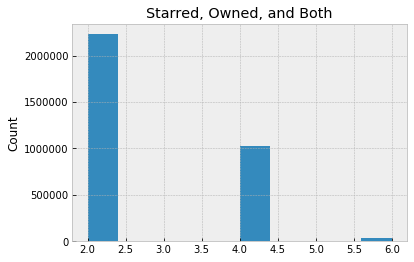

In [95]:
plt.hist(final_data.rating)
plt.title('Starred, Owned, and Both')
plt.ylabel("Count")
plt.savefig('/home/ubuntu/PROJECT/github-collaborator/matplots/star_own_distribution.png');

In [89]:
traindata = pd.read_csv('data/new_subset_data/final_train_data.csv')
testdata = pd.read_csv('data/new_subset_data/final_test_data.csv')

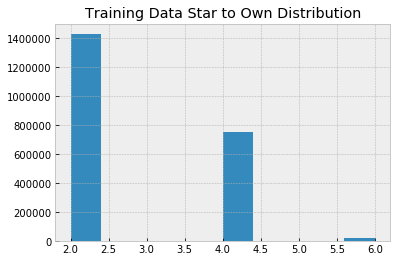

In [90]:
plt.hist(traindata.rating)
plt.title("Training Data Star to Own Distribution");

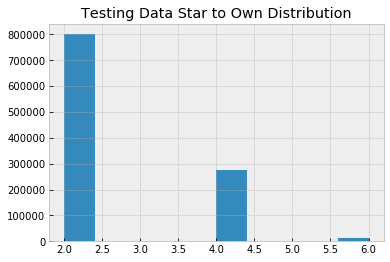

In [91]:
plt.hist(testdata.rating)
plt.title("Testing Data Star to Own Distribution");

## Find mean of data accounting for unbalanced star-to-own repo distribution

In [94]:
final_data.groupby('rating').agg(['count'])

,user,item
,count,count
rating,,
2.0,2229668,2229668
4.0,1031193,1031193
6.0,38589,38589


In [107]:
stars, owns, both, total = 2229668., 1031193., 38589., (2229668. + 1031193. + 38589.)
discounted_mean = 2.0*(stars/total) + 4.0*(owns/total) + 6.0*(both/total)
discounted_mean

2.671851975329221

In [109]:
np.mean(final_data.rating)

2.6718519753292216

## Check unique repo and users in final merged data

In [84]:
repos = pd.read_csv('data/new_subset_data/new_subset_repos.csv', sep='\t')
users = pd.read_csv('data/new_subset_data/new_subset_users.csv', sep='\t')
owns = pd.read_csv('data/new_subset_data/new_subset_owns.csv', sep='\t')
stars = pd.read_csv('data/new_subset_data/new_subset_stars.csv', sep='\t')
final_data = pd.read_csv('data/new_subset_data/ratings_data.csv', sep='\t')


In [85]:
len(repos.id.unique())

1069782

In [86]:
len(final_data.item.unique())

1069782

In [87]:
len(users.id.unique())

50008

In [88]:
# Somehow I ended up with more users in my final set than my original 50k subset
len(final_data.user.unique())

288103